In [1]:
import ccxt
import numpy as np
import pandas as pd
import datetime as dt
from dateutil import tz
import matplotlib.pyplot as plt

import json
import time
import os
import sys

In [2]:
src_path = '../src/'
sys.path.append(os.path.abspath(src_path))
import func_get
import func_signal
import func_backtest

In [3]:
start_ts = time.time()

In [4]:
interval_dict = {
    '1m': 1,
    '5m': 5,
    '15m': 15,
    '30m': 30,
    '1h': 60,
    '2h': 120,
    '4h': 240,
    '1d': 1440
}

In [5]:
with open('../../../_keys/ftx/ftx_read_keys.json') as keys_file:
    keys_dict = json.load(keys_file)
    
exchange = ccxt.ftx({'apiKey': keys_dict['apiKey'],
                     'secret': keys_dict['secret'],
                     'enableRateLimit': True})

### Config

In [6]:
project_name = 'messi'

In [7]:
start_date = dt.datetime(2022, 1, 1)
start_hour = 1
end_date = dt.datetime.today() - dt.timedelta(days=1)
reinvest_profit_flag = True

In [8]:
config_params = {
    'safety_ohlcv_range': 1000,
    'action_timeframe': '2h',
    'target_side': ['buy', 'sell'],
    'base': {
        'symbol': ['ETH-PERP'],
        'open': {
            '2h': {
                'tma': {
                    'check': ['check_signal_side_change'],
                    'look_back': 1,
                    'windows': 50,
                    'revert': False
                }
            }
        },
        'close': {
            '2h': {
                'tma': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 50,
                    'revert': False
                }
            }
        }
    },
    'lead': {
        'symbol': [],
        'open': {
        },
        'close': {
        }
    },
    'tp': {
        'stop_percent': 100,
        'price_percent': None,
        'signal': None,
    },
    'sl': {
        'stop_percent': 100,
        'price_percent': None,
        'signal': None
    },
    'action_percent': 100,
    'leverage': 1,
    'taker_fee_percent': 0.07
}

### Get data

In [9]:
ohlcv_df_dict = func_get.get_data(exchange, start_date, end_date, start_hour, interval_dict, config_params)

base: timeframe 1/1 symbol 1/1 date 1/274
base: timeframe 1/1 symbol 1/1 date 2/274
base: timeframe 1/1 symbol 1/1 date 3/274
base: timeframe 1/1 symbol 1/1 date 4/274
base: timeframe 1/1 symbol 1/1 date 5/274
base: timeframe 1/1 symbol 1/1 date 6/274
base: timeframe 1/1 symbol 1/1 date 7/274
base: timeframe 1/1 symbol 1/1 date 8/274
base: timeframe 1/1 symbol 1/1 date 9/274
base: timeframe 1/1 symbol 1/1 date 10/274
base: timeframe 1/1 symbol 1/1 date 11/274
base: timeframe 1/1 symbol 1/1 date 12/274
base: timeframe 1/1 symbol 1/1 date 13/274
base: timeframe 1/1 symbol 1/1 date 14/274
base: timeframe 1/1 symbol 1/1 date 15/274
base: timeframe 1/1 symbol 1/1 date 16/274
base: timeframe 1/1 symbol 1/1 date 17/274
base: timeframe 1/1 symbol 1/1 date 18/274
base: timeframe 1/1 symbol 1/1 date 19/274
base: timeframe 1/1 symbol 1/1 date 20/274
base: timeframe 1/1 symbol 1/1 date 21/274
base: timeframe 1/1 symbol 1/1 date 22/274
base: timeframe 1/1 symbol 1/1 date 23/274
base: timeframe 1/1 

base: timeframe 1/1 symbol 1/1 date 190/274
base: timeframe 1/1 symbol 1/1 date 191/274
base: timeframe 1/1 symbol 1/1 date 192/274
base: timeframe 1/1 symbol 1/1 date 193/274
base: timeframe 1/1 symbol 1/1 date 194/274
base: timeframe 1/1 symbol 1/1 date 195/274
base: timeframe 1/1 symbol 1/1 date 196/274
base: timeframe 1/1 symbol 1/1 date 197/274
base: timeframe 1/1 symbol 1/1 date 198/274
base: timeframe 1/1 symbol 1/1 date 199/274
base: timeframe 1/1 symbol 1/1 date 200/274
base: timeframe 1/1 symbol 1/1 date 201/274
base: timeframe 1/1 symbol 1/1 date 202/274
base: timeframe 1/1 symbol 1/1 date 203/274
base: timeframe 1/1 symbol 1/1 date 204/274
base: timeframe 1/1 symbol 1/1 date 205/274
base: timeframe 1/1 symbol 1/1 date 206/274
base: timeframe 1/1 symbol 1/1 date 207/274
base: timeframe 1/1 symbol 1/1 date 208/274
base: timeframe 1/1 symbol 1/1 date 209/274
base: timeframe 1/1 symbol 1/1 date 210/274
base: timeframe 1/1 symbol 1/1 date 211/274
base: timeframe 1/1 symbol 1/1 d

### Add signal

In [10]:
ohlcv_df_dict = func_signal.add_signal(start_date, ohlcv_df_dict, interval_dict, config_params)

base add tma to ETH-PERP 2h


### Back test

In [11]:
action_time_list = func_get.gen_action_time_list(config_params, ohlcv_df_dict)
max_open_timeframe = func_backtest.get_max_open_timeframe(config_params, interval_dict)

In [12]:
budget = 100

transaction_dict = {
    'symbol': [],
    'side': [],
    'amount': [],
    'open_time': [],
    'open_price': [],
    'close_time': [],
    'close_price': [],
    'value': [],
    'notional': [],
    'profit': [],
    'profit_percent': []
}

position_dict = {}

if reinvest_profit_flag == True:
    budget_dict = {
        'time': [],
        'budget': []
    }
    
max_drawdown = 0

In [13]:
if reinvest_profit_flag == True:
    min_budget = budget

time_count = 0

for signal_time in action_time_list:
    action_time = signal_time + dt.timedelta(minutes=interval_dict[config_params['action_timeframe']])
    
    time_count += 1
    print(f"Time {action_time}: progress {time_count}/{len(action_time_list)}")

    '''
    Close positions
    '''
    for symbol in [x for x in position_dict.keys()]:
        print(f"  {symbol}")
        budget, max_drawdown, position_dict, transaction_dict = func_backtest.close_position(symbol, signal_time, max_drawdown, config_params, budget, reinvest_profit_flag, ohlcv_df_dict, position_dict, transaction_dict, interval_dict)

    '''
    Open positions
    '''
    max_position = int(1 / (config_params['action_percent'] / 100))

    for symbol in [x for x in config_params['base']['symbol'] if x not in position_dict.keys()][:max_position]:
        print(f"  {symbol}")
        position_dict = func_backtest.open_position(symbol, signal_time, max_open_timeframe, config_params, budget, ohlcv_df_dict, position_dict, interval_dict)    
    
    '''
    Update budget
    '''
    if reinvest_profit_flag == True:
        budget_dict['time'].append(signal_time)
        budget_dict['budget'].append(budget)

        if budget < min_budget:
            min_budget = budget

    if budget <= 0:
        print(f"Out of money at {action_time}")
        break
        
'''
Clear final position
'''
opened_symbol = list(position_dict.keys())

for symbol in opened_symbol:
    print(f" Clear {symbol} position")
    
    side = position_dict[symbol]['side']
    ohlcv_df = ohlcv_df_dict['base'][config_params['action_timeframe']][symbol]
    current_ohlcv_df = ohlcv_df[ohlcv_df['time'] == signal_time].reset_index(drop=True)
    close_price = current_ohlcv_df.loc[0, 'close']
    close_percent = 100
    
    budget, position_dict, transaction_dict = func_backtest.update_close_position(symbol, side, close_price, close_percent, signal_time, config_params, budget, reinvest_profit_flag, position_dict, transaction_dict, interval_dict)

Time 2022-01-01 03:00:00: progress 1/1284
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 05:00:00: progress 2/1284
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 07:00:00: progress 3/1284
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 09:00:00: progress 4/1284
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 11:00:00: progress 5/1284
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 13:00:00: progress 6/1284
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 15:00:00: progress 7/1284
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 17:00:00: progress 8/1284
  ETH-PERP
     base ETH-PERP check_signal_side_

     Not close
Time 2022-01-21 19:00:00: progress 249/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-21 21:00:00: progress 250/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-21 23:00:00: progress 251/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-22 01:00:00: progress 252/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-22 03:00:00: progress 253/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-22 05:00:00: progress 254/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-22 07:00:00: progress 255/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-22 09:00:00: progress 256/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-22 11:00:00:

     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-10 11:00:00: progress 485/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-10 13:00:00: progress 486/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-10 15:00:00: progress 487/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-10 17:00:00: progress 488/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-10 19:00:00: progress 489/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-10 21:00:00: progress 490/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-10 23:00:00: progress 491/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-11 01:00:00: progress 492/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy

     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-04 21:00:00: progress 754/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-04 23:00:00: progress 755/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-05 01:00:00: progress 756/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-05 03:00:00: progress 757/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-05 05:00:00: progress 758/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-05 07:00:00: progress 759/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-05 09:00:00: progress 760/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-05 11:00:00: progress 761/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma

     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-25 21:00:00: progress 1006/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-25 23:00:00: progress 1007/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-26 01:00:00: progress 1008/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-26 03:00:00: progress 1009/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-26 05:00:00: progress 1010/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-26 07:00:00: progress 1011/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-26 09:00:00: progress 1012/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-26 11:00:00: progress 1013/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma

     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-14 21:00:00: progress 1246/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Closed by signal at 3046.5
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: sell
     sell: 0.04292309590593649
     price: 3046.5
     tp: 0
     sl: inf
Time 2022-04-14 23:00:00: progress 1247/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-15 01:00:00: progress 1248/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-15 03:00:00: progress 1249/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-15 05:00:00: progress 1250/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-15 07:00:00: progress 1251/1284
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-15 09:00:00: progress 1252/1284
  ETH-

In [14]:
end_ts = time.time()
time_process = end_ts - start_ts
print(f"Time process: {round(time_process / 60, 2)} minutes")

Time process: 0.95 minutes


### Result

In [15]:
transaction_df = pd.DataFrame(transaction_dict)
transaction_df.to_csv(f'transactions/{project_name}.csv', index=False)
transaction_df

,symbol,side,amount,open_time,open_price,close_time,close_price,value,notional,profit,profit_percent
0,ETH-PERP,buy,0.026592,2022-01-02 01:00:00,3760.6,2022-01-04 03:00:00,3738.5,100.000000,100.000000,-0.727261,-0.726752
1,ETH-PERP,sell,0.026554,2022-01-04 03:00:00,3738.5,2022-01-04 07:00:00,3765.0,99.272739,99.272739,-0.843160,-0.849932
2,ETH-PERP,buy,0.026143,2022-01-04 07:00:00,3765.0,2022-01-04 09:00:00,3732.2,98.429579,98.429579,-0.994702,-1.009865
3,ETH-PERP,sell,0.026107,2022-01-04 09:00:00,3732.2,2022-01-04 15:00:00,3763.8,97.434878,97.434878,-0.961953,-0.987970
4,ETH-PERP,buy,0.025632,2022-01-04 15:00:00,3763.8,2022-01-06 01:00:00,3773.1,96.472924,96.472924,0.103147,0.106843
...,...,...,...,...,...,...,...,...,...,...,...
58,ETH-PERP,buy,0.042984,2022-04-14 05:00:00,3105.7,2022-04-14 21:00:00,3046.5,133.494968,133.494968,-2.729756,-2.043408
59,ETH-PERP,sell,0.042923,2022-04-14 21:00:00,3046.5,2022-04-17 05:00:00,3050.5,130.765212,130.765212,-0.354884,-0.271580
60,ETH-PERP,buy,0.042750,2022-04-17 05:00:00,3050.5,2022-04-17 11:00:00,3028.8,130.410328,130.410328,-1.109610,-0.850266
61,ETH-PERP,sell,0.042690,2022-04-17 11:00:00,3028.8,2022-04-17 17:00:00,3043.0,129.300717,129.300717,-0.787649,-0.609587


In [16]:
if reinvest_profit_flag == True:
    print(f"Final budget: {round(budget, 2)}")
else:
    print("Not reinvest profit")

Final budget: 128.65


In [17]:
if reinvest_profit_flag == True:
    return_percent = (budget_dict['budget'][-1] - budget_dict['budget'][0]) / budget_dict['budget'][0] * 100
    print(f"Return: {round(return_percent, 2)}%")
else:
    print("Not reinvest profit")

Return: 28.51%


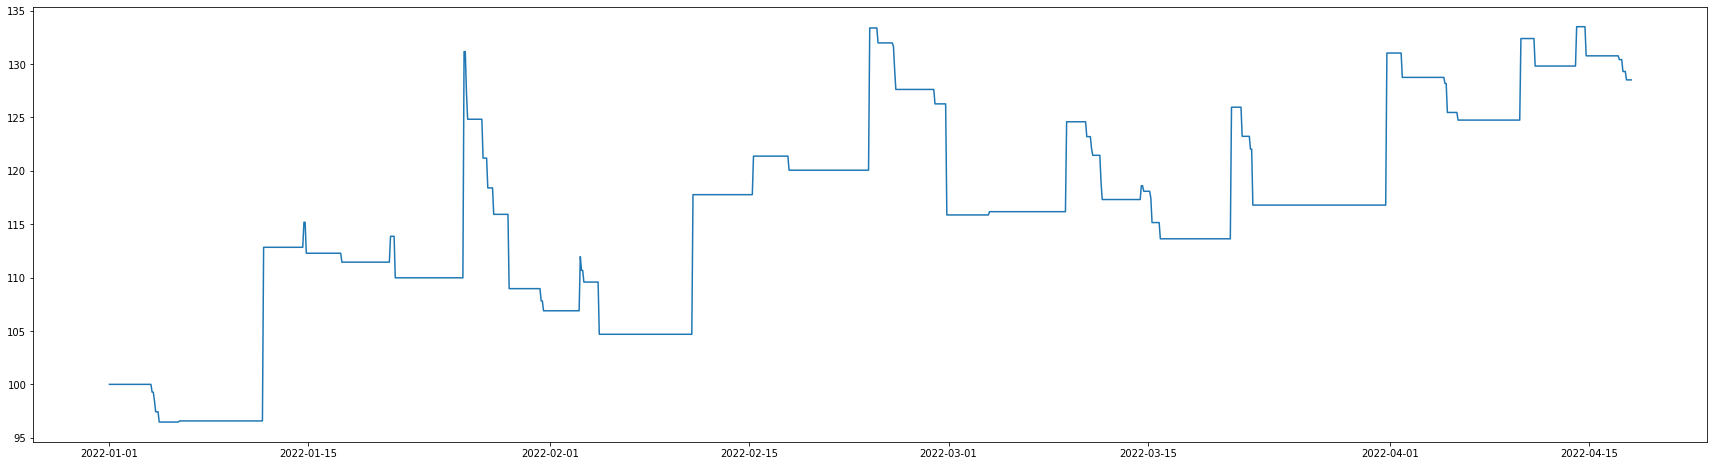

In [18]:
if reinvest_profit_flag == True:
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.plot(budget_dict['time'], budget_dict['budget'])
else:
    print("Not reinvest profit")

In [19]:
if reinvest_profit_flag == True:
    print(f"Max drawdown: {round(max_drawdown * 100, 2)}%")

Max drawdown: 8.09%


In [20]:
win_rate = len(transaction_df[transaction_df['profit'] > 0]) / len(transaction_df)
print(f"Win rate: {round(win_rate * 100, 2)}%")

Win rate: 26.98%


In [21]:
for symbol in transaction_df['symbol'].unique():
    symbol_df = transaction_df[transaction_df['symbol'] == symbol]
    win_rate = len(symbol_df[symbol_df['profit'] > 0]) / len(symbol_df)
    print(f"{symbol} win rate: {round(win_rate * 100, 2)}%")

ETH-PERP win rate: 26.98%


In [22]:
print(f"Distribution")
print(pd.DataFrame(transaction_df['profit_percent'].describe()))

Distribution
       profit_percent
count       63.000000
mean         0.517361
std          5.029840
min         -8.243055
25%         -1.946004
50%         -0.972555
75%          0.106532
max         19.280460


In [23]:
for symbol in transaction_df['symbol'].unique():
    temp_return = transaction_df[transaction_df['symbol'] == symbol]['profit_percent']
    
    print(f"Distribution {symbol}:")
    print(pd.DataFrame(temp_return.describe()))
    print("\n")

Distribution ETH-PERP:
       profit_percent
count       63.000000
mean         0.517361
std          5.029840
min         -8.243055
25%         -1.946004
50%         -0.972555
75%          0.106532
max         19.280460




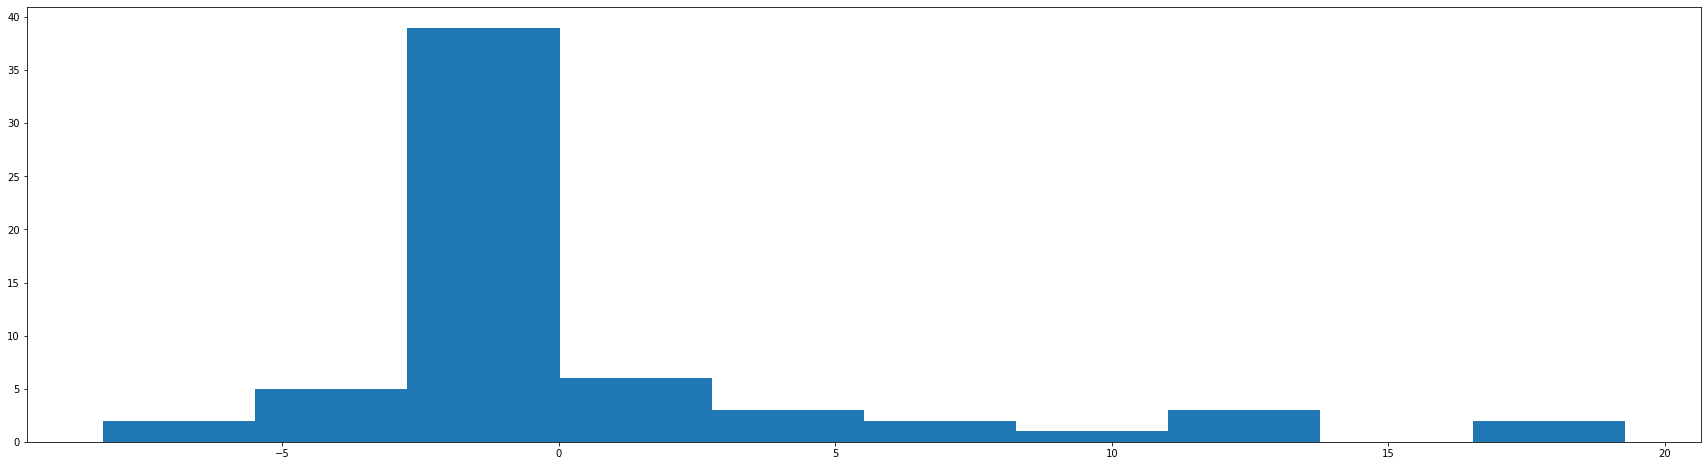

In [24]:
fig, ax = plt.subplots(figsize=(30, 8))
_ = ax.hist(transaction_df['profit_percent'], bins=10)